In [1]:
import numpy as np
from libsvm.svm import *
from libsvm.svmutil import *
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [115]:
#file path
file='2019MT10718.csv'

In [177]:
#data taken from file
data=np.genfromtxt(file,delimiter=',')
req_data=[x for x in data if x[25] in [2,9]]
data=np.array(req_data)

In [178]:
data.shape

(572, 26)

In [179]:
data[:5]

array([[ 0.68215146, -3.75910689,  0.71575991,  2.65501045,  2.59928115,
         0.40998208,  2.52861475,  0.79589945,  0.71030341,  1.60383507,
        -1.28599391,  1.19039566, -0.64298009, -0.38627133,  0.18087569,
        -0.58141077, -0.79894262, -0.40541746,  1.26233845, -1.46279854,
         0.92572399, -0.15382033, -0.04506457, -0.43566477, -2.16191859,
         2.        ],
       [ 0.12771965, -3.95531803, -1.30546097, -0.32481492,  1.3886469 ,
         1.82980973, -1.31122053, -0.05619508, -1.07378722, -0.15789032,
        -1.00394121,  0.5813574 , -0.5017444 , -2.32838131, -0.90997244,
        -0.34603932,  0.99993276, -0.06352084,  0.27549702, -1.17873888,
         0.55467943,  0.35753273, -0.5080592 ,  0.15252672, -0.21159436,
         2.        ],
       [-1.71836363,  1.5201162 , -1.43703855, -0.7949268 ,  0.89454232,
        -1.99281177, -0.0918925 , -1.63698497,  1.1195401 ,  2.2860774 ,
        -0.77765045,  0.55414148,  0.08182983,  0.16079859,  0.69844511,
       

In [190]:
#xdata=data[:,:25]
tdata=data[:,25:].flatten()
xdata=data[:,:10]

#tdata=tdata.reshape(tdata.shape[0],1)

In [191]:
tdata.shape

(572,)

In [192]:
tdata.dtype

dtype('float64')

In [193]:
model = svm_train(tdata, xdata)

In [194]:
start_time = time.time()
p_labs, p_acc, p_vals = svm_predict(tdata, xdata, model )
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy = 100% (572/572) (classification)
--- 0.021034955978393555 seconds ---


2
Accuracy = 98.6014% (282/286) (classification)
Accuracy = 98.951% (283/286) (classification)
98.77622377622377
3
Accuracy = 98.4211% (187/190) (classification)
Accuracy = 98.4211% (187/190) (classification)
Accuracy = 98.4211% (187/190) (classification)
98.42105263157895
4
Accuracy = 98.6014% (141/143) (classification)
Accuracy = 97.9021% (140/143) (classification)
Accuracy = 97.9021% (140/143) (classification)
Accuracy = 97.9021% (140/143) (classification)
98.07692307692308
5
Accuracy = 99.1228% (113/114) (classification)
Accuracy = 99.1228% (113/114) (classification)
Accuracy = 99.1228% (113/114) (classification)
Accuracy = 98.2456% (112/114) (classification)
Accuracy = 98.2456% (112/114) (classification)
98.7719298245614
6
Accuracy = 98.9474% (94/95) (classification)
Accuracy = 98.9474% (94/95) (classification)
Accuracy = 98.9474% (94/95) (classification)
Accuracy = 98.9474% (94/95) (classification)
Accuracy = 98.9474% (94/95) (classification)
Accuracy = 97.8947% (93/95) (classifi

Accuracy = 100% (30/30) (classification)
Accuracy = 96.6667% (29/30) (classification)
Accuracy = 93.3333% (28/30) (classification)
Accuracy = 96.6667% (29/30) (classification)
98.77192982456141
20
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 96.4286% (27/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 96.4286% (27/28) (classification)
Accuracy = 96.4286% (27/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 92.8571% (26/28) (classification)
Accuracy = 100% (28/28) (classification)
Accuracy = 96.4286% (27/28) (classification)
Accu

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


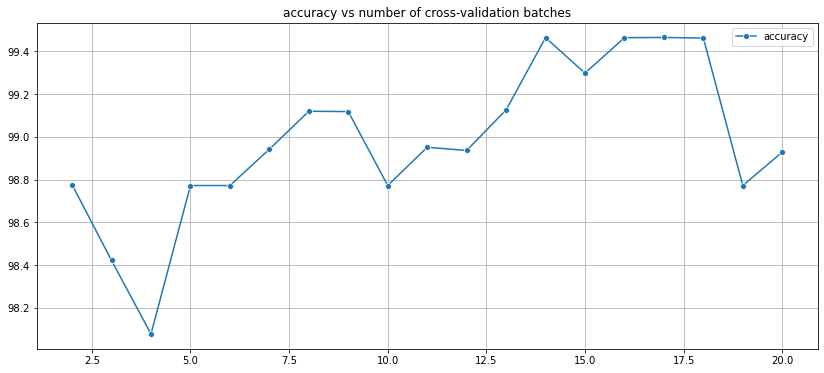

In [195]:
err=[]
min_lim=2
max_lim=21
for k in range(min_lim,max_lim):
    #k batch cross val (k taken to be 6 gives good result)
    data_points_total=xdata.shape[0]
    val_set_size=int(data_points_total/k)
    train_set_size=data_points_total-val_set_size
    accuracy=[]
    print(k)
    for val_step in range(k):
        test_begin_index=k*val_step
        test_end_index=min(test_begin_index+val_set_size,data_points_total)
        xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
        ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
        r=ttrain.shape[0]
        c=int(xtrain.shape[0]/r)
        xtrain=xtrain.reshape(r,c)
        xvalid=xdata[test_begin_index:test_end_index]
        tvalid=tdata[test_begin_index:test_end_index]
        #print(xvalid.shape,xtrain.shape)
        #print(tvalid)
        model = svm_train(ttrain, xtrain)
        p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
        accuracy.append(p_acc[0])
    print(np.mean(accuracy))
    err.append(np.mean(accuracy))
#best fit poly after cross_validation
xp=[i for i in range(min_lim,max_lim)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,err,marker='o',label='accuracy')
plt.title('accuracy vs number of cross-validation batches')
plt.grid(True)
plt.show()

In [196]:
#6 batch cross val 
data_points_total=xdata.shape[0]
k=6
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
accuracy=[]
for val_step in range(k):
    test_begin_index=k*val_step
    test_end_index=min(test_begin_index+val_set_size,data_points_total)
    xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
    ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
    r=ttrain.shape[0]
    c=int(xtrain.shape[0]/r)
    xtrain=xtrain.reshape(r,c)
    xvalid=xdata[test_begin_index:test_end_index]
    tvalid=tdata[test_begin_index:test_end_index]
    #print(xvalid.shape,xtrain.shape)
    #print(tvalid)
    model = svm_train(ttrain, xtrain )
    start_time = time.time()
    p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
    print("--- %s seconds ---" % (time.time() - start_time))
    accuracy.append(p_acc[0])

print('Number of batches',k)
print('Number of features are', 10)
#print('gamma value is',2)
print('final accuracy',np.mean(accuracy))

Accuracy = 98.9474% (94/95) (classification)
--- 0.0015439987182617188 seconds ---
Accuracy = 98.9474% (94/95) (classification)
--- 0.001499176025390625 seconds ---
Accuracy = 98.9474% (94/95) (classification)
--- 0.0013170242309570312 seconds ---
Accuracy = 98.9474% (94/95) (classification)
--- 0.0012848377227783203 seconds ---
Accuracy = 98.9474% (94/95) (classification)
--- 0.0013420581817626953 seconds ---
Accuracy = 97.8947% (93/95) (classification)
--- 0.0012769699096679688 seconds ---
Number of batches 6
Number of features are 10
final accuracy 98.77192982456141
